# PDF to Python

[Simone Lombardini](https://sites.google.com/view/simone-lombardini/home-page) - July 2020

## Import text from pdf

This notebooks extracts the text from the report of the [Effectiveness Review in Lebanon](https://policy-practice.oxfam.org.uk/publications/womens-empowerment-in-lebanon-impact-evaluation-of-the-womens-access-to-justice-620862) and conducts some basic text analysis. It uses the function **PyPDF2** which works only if the pdf is already set up as text. 

In [1]:
import PyPDF2 
import textract
import numpy as np  

In [2]:
filename = 'er-lebanon-womens-empowerment-120919-en.pdf' 

#open allows you to read the file.
pdfFileObj = open(filename,'rb')

#The pdfReader variable is a readable object that will be parsed.
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

#Discerning the number of pages will allow us to parse through all the pages.
num_pages = pdfReader.numPages
count = 0
text = ""

#The while loop will read each page.
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()

#This if statement exists to check if the above library returned words. It's done because PyPDF2 cannot read scanned files.
if text != "":
   text = text

#If the above returns as False, we run the OCR library textract to #convert scanned/image based PDF files into text.
else:
   text = textract.process(fileurl, method='tesseract', language='eng')

#Now we have a text variable that contains all the text derived from our PDF file. 

In [3]:
print(text)

EVALUATION: FEBRUARY
 
2018
 
PUBLICATION: SEPTEMB
ER 2019 
 
SIMONE LOMBARDINI, ROSA GARWOOD, and 
HUR HASSNAIN 
 
OXFAM GB 
 
 
With support from Khalil Wehbe, Jab We
hbe, Diana Semaan and Hoda Barakat.  
 
 
www.oxfam.org.uk/effectiveness
 
 

EMPOWERMENT 
IN LEBANON
 


 
Effectiveness Review Series 2017/18
 
Photo credit: 
LECORVAW
 
 
 
 
 
 

 

Lebanon. Effectiveness Review Series 2017

18
 
2
 
CONTENTS
 
Contents
 
................................
................................
................................
......................
 
2
 
Acknowledgements
 
................................
................................
................................
....
 
3
 
Abbreviations
 
................................
................................
................................
..............
 
4
 
Executive Summary
 
................................
................................
................................
....
 
5
 
Project description
 
..........................

## Text analysis

It then performs some basic text analysis.

In [4]:
print ("There are total of {} words in the document.".format(len(text)))

There are total of 158530 words in the document.


In [5]:
import string 
import re 
import nltk
import regex

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In order to process the text we first need to perform some pre-processing including:
* **Tokenization** is the process of splitting sentences into words
* **Stemming** is the process to normalizing words into its base form or root form (for example waited, waiting, waits to wait)
* **Lemmatization** is the process of grouping together words from different forms so they can be analysed as a single item (e.g. better -> good)
* **Stop works** is the process of removing commonly used English words like “I”, “he”, “my”, “and” etc. as well as any symbols and punctuations.

In [6]:
wn = WordNetLemmatizer()
#pst = PorterStemmer()
stop_words_ = set(stopwords.words('english'))
my_sw = ['Ahmad', 'omit']

def black_txt(token):
    return token not in stop_words_ and token not in list(string.punctuation) and len(token)>2 and token not in my_sw
  
def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",text)
  text = re.sub("(\\d|\\W)+"," ",text)
  text = re.sub(r'[^\x00-\x7f]',r'', text) 
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
  #clean_text2 = [ pst.stem(word) for word in clean_text if black_txt(word)]
  clean_text3 = [word for word in clean_text if black_txt(word)]
  return " ".join(clean_text3)

In [7]:
cleantext = clean_txt(text)
print("There are a total of {} words after cleaning.".format(len(cleantext)))

There are a total of 95145 words after cleaning.


In [8]:
print(cleantext)

evaluation february publication septemb simone lombardini rosa garwood hur hassnain oxfam support khalil wehbe jab hbe diana semaan hoda barakat www oxfam org effectiveness empowerment lebanon effectiveness review series photo credit lecorvaw lebanon effectiveness review series content content acknowledgements abbreviations executive summary project description evaluation design result lessons learn introduction project description evaluation design deal complex interventions quasi experimental individual survey life history interview configurational analysis data sample procedure sample individual survey sample life history interview result individual survey project participation access justice exposure violence configurational analysis art divorce intimate partner relationship conclusions lessons learn appendix checklist assess level complexity appendix thresholds characteris appendix methodology use propensity score match appendix risk bias table appendix methodology use evalc note 

### Word cloud

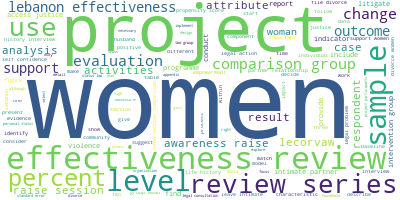

In [9]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(cleantext)
# Visualize the word cloud
wordcloud.to_image()

### Most frequently used workds

In [10]:
from collections import Counter

# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
# split() returns list of all the words in the string 
split_it = cleantext.split() 
  
# Pass the split_it list to instance of Counter class. 
CounterVar = Counter(split_it)
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = CounterVar.most_common(10) 
  
print (f"The 10 most frequent words are: {most_occur}") 

The 10 most frequent words are: [('women', 280), ('group', 154), ('legal', 141), ('project', 127), ('support', 101), ('review', 85), ('level', 85), ('effectiveness', 84), ('intervention', 81), ('comparison', 81)]


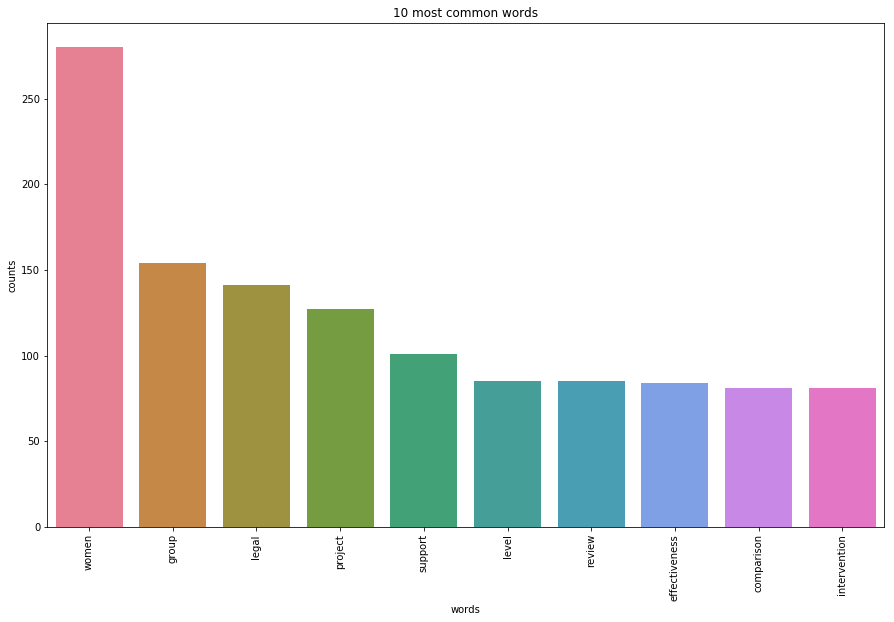

In [12]:
# graphs
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(split_it)

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

### Links:

Some of this code is coming from "[How to Extract Words From PDFs With Python](https://medium.com/better-programming/how-to-convert-pdfs-into-searchable-key-words-with-python-85aab86c544f)".